# Area of the occultor "lens"

In this notebook we'll validate the analytical expression for the area of the "lens" of overlap between the occulted body and the occultor.

In [2]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib notebook

Here is the analytical expression for the lens area defined in the text:

In [1]:
def ALens(r, b):
    if (1 + r <= b):
        return 0
    elif abs(1 - r) < b and b <= 1 + r:
        term = np.sqrt((4 * b ** 2 - (1 + b ** 2 - r ** 2) ** 2) / 4)
        kappa0 = np.arccos(((r - 1) * (r + 1) + b ** 2) / (2 * b * r))
        kappa1 = np.arccos(((1 - r) * (1 + r) + b ** 2) / (2 * b))
        return r ** 2 * kappa0 + kappa1 - term
    elif b <= 1 - r:
        return np.pi * r ** 2
    elif b <= r - 1:
        return np.pi
    else:
        raise NotImplementedError("Missing case!")

And here we define a numerical version to validate it. We grid up the smaller of the two bodies and add up the area from each cell that is inside both the occultor and the occulted body.

In [42]:
def ALensNumerical(r, b, n=300):
    if r < 1:
        xarr = np.linspace(-r, r, n)
        yarr = np.linspace(b - r, b + r, n)
        dA = (4. * r ** 2) / n ** 2
    else:
        xarr = np.linspace(-1, 1, n)
        yarr = np.linspace(-1, 1, n)
        dA = 4. / n ** 2
    area = 0 
    for i, x in enumerate(xarr):
        for j, y in enumerate(yarr):
            # If inside the occulted body
            if (x ** 2 + y ** 2 <= 1):
                # If inside the occultor:
                if (x ** 2 + (y - b) ** 2 <= r ** 2):
                    area += dA
    return area

Let's show that the expressions yield the same answer (to within the error of the numerical method) over a large range of $b$ and $r$ values:

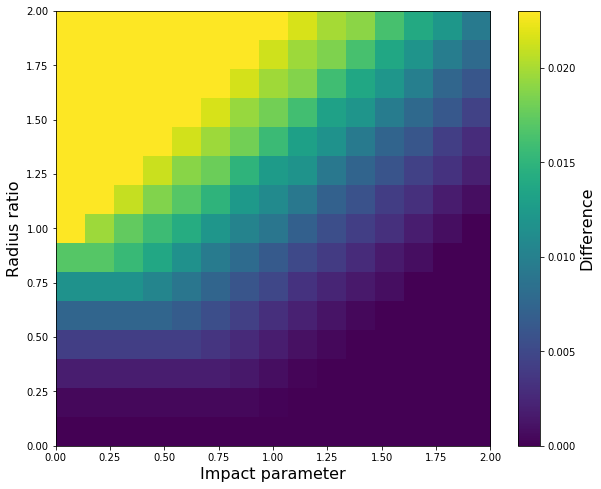

In [43]:
n = 15
barr = np.linspace(0, 2, n)
rarr = np.linspace(0, 2, n)
diff = np.zeros((n, n))
for i, b in enumerate(barr):
    for j, r in enumerate(rarr):
        diff[j, i] = abs(ALens(r, b) - ALensNumerical(r, b))

fig = pl.figure(figsize=(10, 8))
pl.imshow(diff, origin="lower", extent=(0, 2, 0, 2))
pl.xlabel("Impact parameter", fontsize=16)
pl.ylabel("Radius ratio", fontsize=16)
cb = pl.colorbar()
cb.ax.set_ylabel("Difference", fontsize=16);

The difference is small ($<0.02$) everywhere, and actually continues to decrease as the number of grid points is increased in `ALensNumerical`. So our expression is correct!